# Data Exploration

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
colors = sns.color_palette('Blues_d')[0:6]
matplotlib.rcParams['figure.facecolor'] = 'white'

In [2]:
df = pd.read_csv('DataAnalyst.csv')
cli_usa = pd.read_csv("coli.csv")

In [3]:
def get_state(x):
    # if there are more than 1 commas in the string, then the state is the 2nd last element
    if x.count(',') > 1:
        return x.split(', ')[2]
    else:
        return x.split(', ')[1]

In [4]:
def get_median_salary(x):
    if x == '-1':
        return -1
    range_salary = x.split('-')
    n1 = range_salary[0].replace('$', '').replace('K', '').replace(' ', '')
    n2 = range_salary[1].replace('$', '').replace('K', '').replace(' ', '')
    
    # create array of numbers between n1 and n2
    range_salary = np.arange(int(n1), int(n2)+1, 1)
    # get median
    range_salary = np.median(range_salary) * 1000
    return range_salary

In [5]:
# drop the first column
def data_cleaning(df):
    df.drop(df.columns[0], axis=1, inplace=True)
    df['Salary Estimate'] = df['Salary Estimate'].apply(lambda x: x.split('(')[0])
    df.fillna("Not Available", inplace=True)
    df["Company Name"] = df["Company Name"].apply(lambda x: x.split('\n')[0])
    df["Size"] = df["Size"].apply(lambda x: x.split('employees')[0])
    df["Size"] = df["Size"].apply(lambda x: x.replace(" to ", "-"))
    df["Type of ownership"] = df["Type of ownership"].apply(lambda x: "Unknown" if x == "-1" else x)
    df["Competitors"] = df["Competitors"].apply(lambda x: "Unknown" if x == "-1" else x)
    df["Easy Apply"] = df["Easy Apply"].apply(lambda x: "False" if x == "-1" else "True")

    df['State'] = df['Location'].apply(get_state)
    df['City'] = df['Location'].apply(lambda x: x.split(',')[0])

    # merge with cost of living index by city and state
    df = df.merge(cli_usa, how='left', left_on=['City', 'State'], right_on=['City', 'State'])

    # add a new column with the median salary
    df['Salary'] = df['Salary Estimate'].apply(get_median_salary)
    
    df = df[df['Cost of Living Index'].notna()]
    # divide cost of living by 100
    df['Cost of Living Index'] = df['Cost of Living Index'] / 100
    # make a new column, salary adjusted for cost of living
    df['Adjusted salary'] = df['Salary'] / df['Cost of Living Index']
    df['Adjusted salary'] = df['Adjusted salary'].astype(int)
    df = df.drop_duplicates()
    
    return df

df = data_cleaning(df)

In [6]:
# df.to_csv('cleaned_data.csv', index=False)

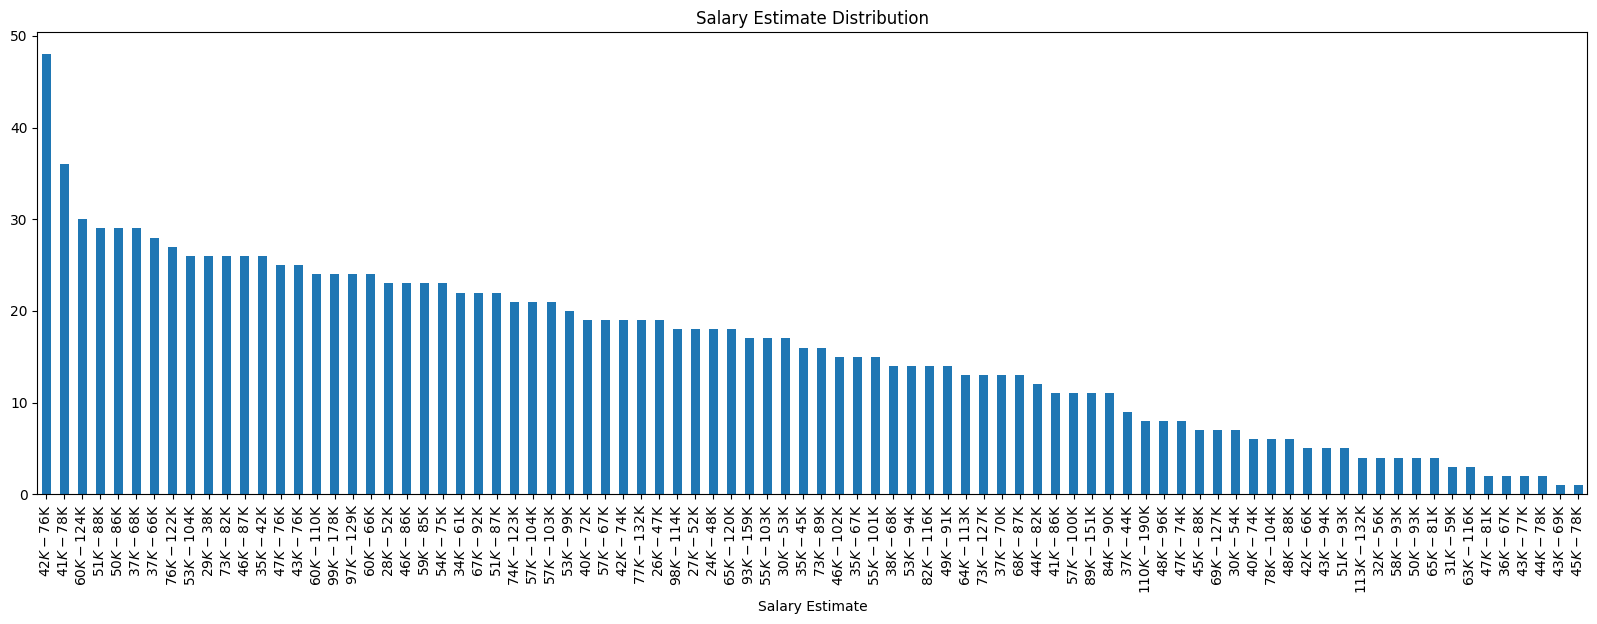

In [7]:
def plot_salary_estimate(df):
    # plot using matplotlib
    fig = plt.figure(figsize=(20, 6))
    df["Salary Estimate"].value_counts().plot(kind='bar')
    plt.xticks(rotation=90)
    plt.title("Salary Estimate Distribution")
    plt.show()
plot_salary_estimate(df)

In [8]:
df

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Easy Apply,State,City,Cost of Living Index,Salary,Adjusted salary
0,"Data Analyst, Center on Immigration and Justic...",$37K-$66K,Are you eager to roll up your sleeves and harn...,3.2,Vera Institute of Justice,"New York, NY","New York, NY",201-500,1961,Nonprofit Organization,Social Assistance,Non-Profit,$100 to $500 million (USD),Unknown,True,NY,New York,1.280,51500.0,40234
1,Quality Data Analyst,$37K-$66K,Overview\n\nProvides analytical and technical ...,3.8,Visiting Nurse Service of New York,"New York, NY","New York, NY",10000+,1893,Nonprofit Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),Unknown,False,NY,New York,1.280,51500.0,40234
2,"Senior Data Analyst, Insights & Analytics Team...",$37K-$66K,We’re looking for a Senior Data Analyst who ha...,3.4,Squarespace,"New York, NY","New York, NY",1001-5000,2003,Company - Private,Internet,Information Technology,Unknown / Non-Applicable,GoDaddy,False,NY,New York,1.280,51500.0,40234
3,Data Analyst,$37K-$66K,Requisition NumberRR-0001939\nRemote:Yes\nWe c...,4.1,Celerity,"New York, NY","McLean, VA",201-500,2002,Subsidiary or Business Segment,IT Services,Information Technology,$50 to $100 million (USD),Unknown,False,NY,New York,1.280,51500.0,40234
4,Reporting Data Analyst,$37K-$66K,ABOUT FANDUEL GROUP\n\nFanDuel Group is a worl...,3.9,FanDuel,"New York, NY","New York, NY",501-1000,2009,Company - Private,Sports & Recreation,"Arts, Entertainment & Recreation",$100 to $500 million (USD),DraftKings,True,NY,New York,1.280,51500.0,40234
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2241,Data Security Analyst fr,$78K-$104K,Maintains systems to protect data from unautho...,2.5,"Avacend, Inc.","Denver, CO","Alpharetta, GA",51-200,-1,Company - Private,Staffing & Outsourcing,Business Services,Unknown / Non-Applicable,Unknown,False,CO,Denver,1.121,91000.0,81177
2244,"Data Security Analyst, Sr",$78K-$104K,Contract Duration: 9 Months\n\nLocation: Denve...,2.5,"Avacend, Inc.","Denver, CO","Alpharetta, GA",51-200,-1,Company - Private,Staffing & Outsourcing,Business Services,Unknown / Non-Applicable,Unknown,False,CO,Denver,1.121,91000.0,81177
2246,"Technical Business Analyst (SQL, Data analytic...",$78K-$104K,Spiceorb is looking for Technical Business Ana...,-1.0,Spiceorb,"Denver, CO",-1,-1,-1,Unknown,-1,-1,-1,Unknown,False,CO,Denver,1.121,91000.0,81177
2248,RQS - IHHA - 201900004460 -1q Data Security An...,$78K-$104K,Maintains systems to protect data from unautho...,2.5,"Avacend, Inc.","Denver, CO","Alpharetta, GA",51-200,-1,Company - Private,Staffing & Outsourcing,Business Services,Unknown / Non-Applicable,Unknown,False,CO,Denver,1.121,91000.0,81177


/var/folders/0m/_y7l8ln90mlbfr427hwkgw000000gn/T/ipykernel_92252/3735434276.py:7: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('Set3', num_states)


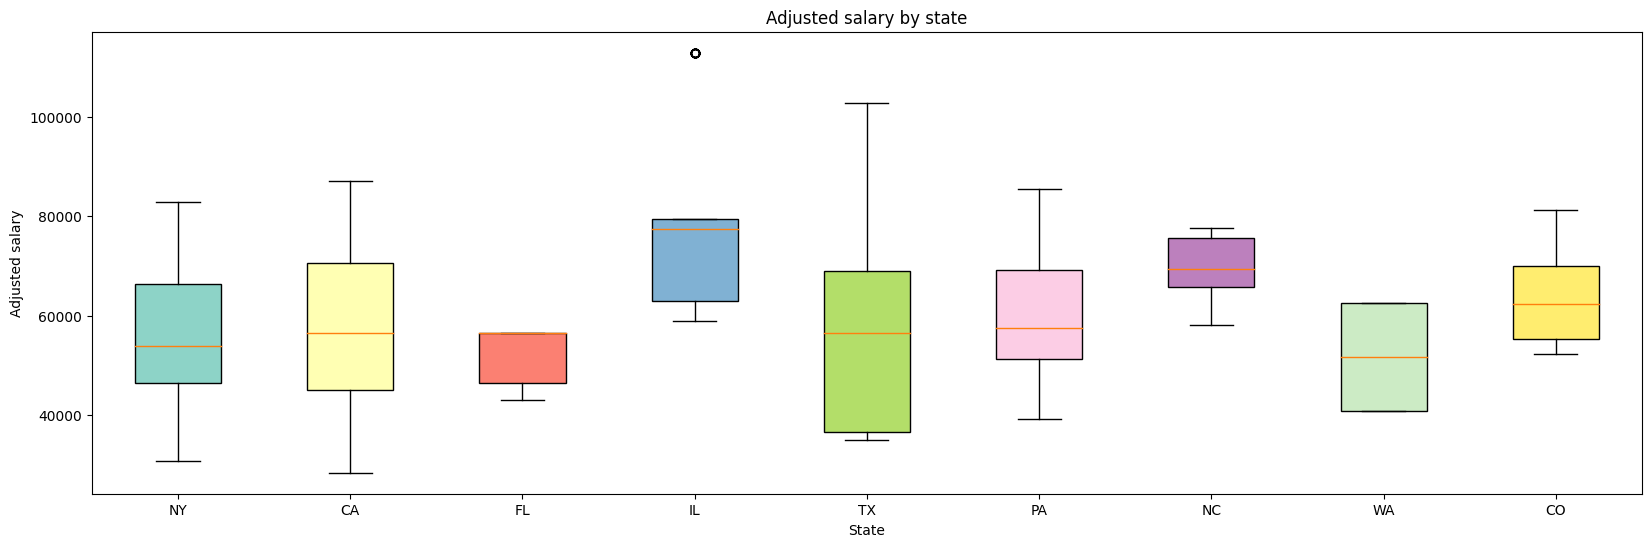

In [27]:
def plot_box(data, x, y):
    data = data[data["State"].isin(["NY", "CA", "FL", "IL", "TX", "PA", "NC", "WA", "CO"])]
    unique_states = data["State"].unique()
    num_states = len(unique_states)


    colors = plt.cm.get_cmap('Set3', num_states)
    fig, ax = plt.subplots(figsize=(20, 6))
    boxplot = ax.boxplot([data[data["State"] == state]["Adjusted salary"] for state in unique_states], patch_artist=True)

    # Assign a different color to each boxplot
    for patch, color in zip(boxplot['boxes'], colors(range(num_states))):
        patch.set_facecolor(color)

    ax.set_title("Adjusted salary by state")
    ax.set_ylabel("Adjusted salary")
    ax.set_xlabel("State")
    ax.set_xticklabels(unique_states)

    plt.show()

plot_box(df, "State", "Adjusted salary")

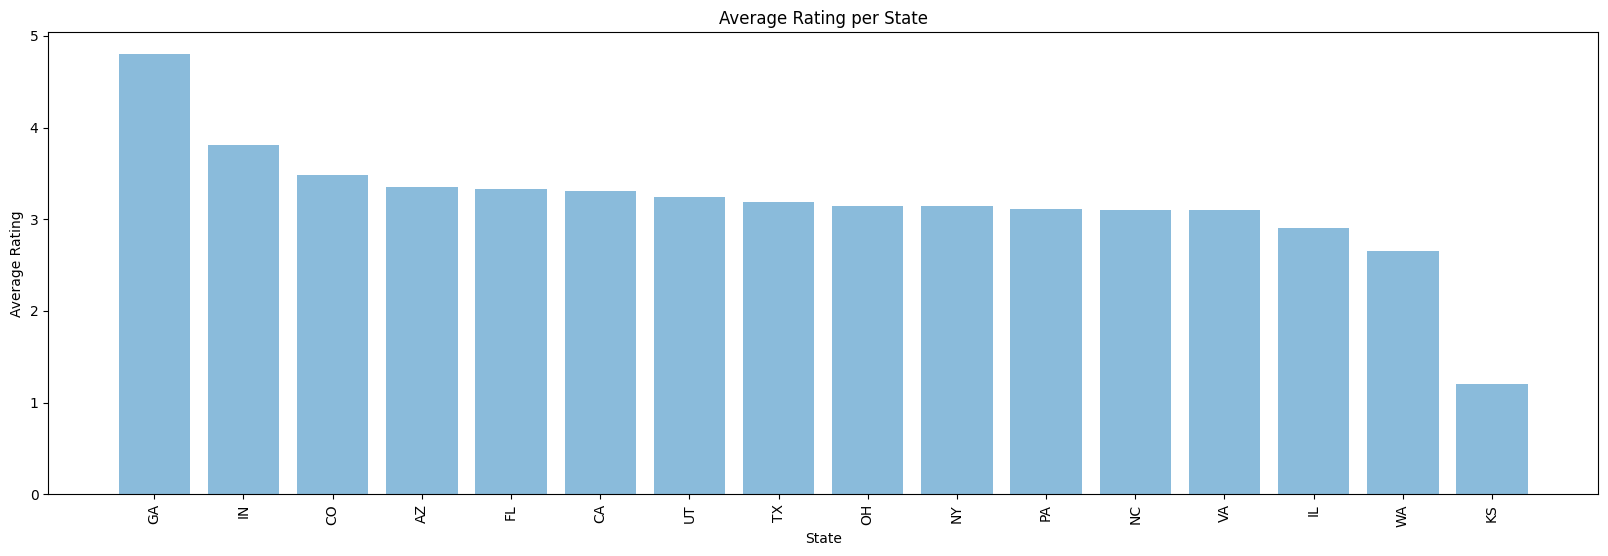

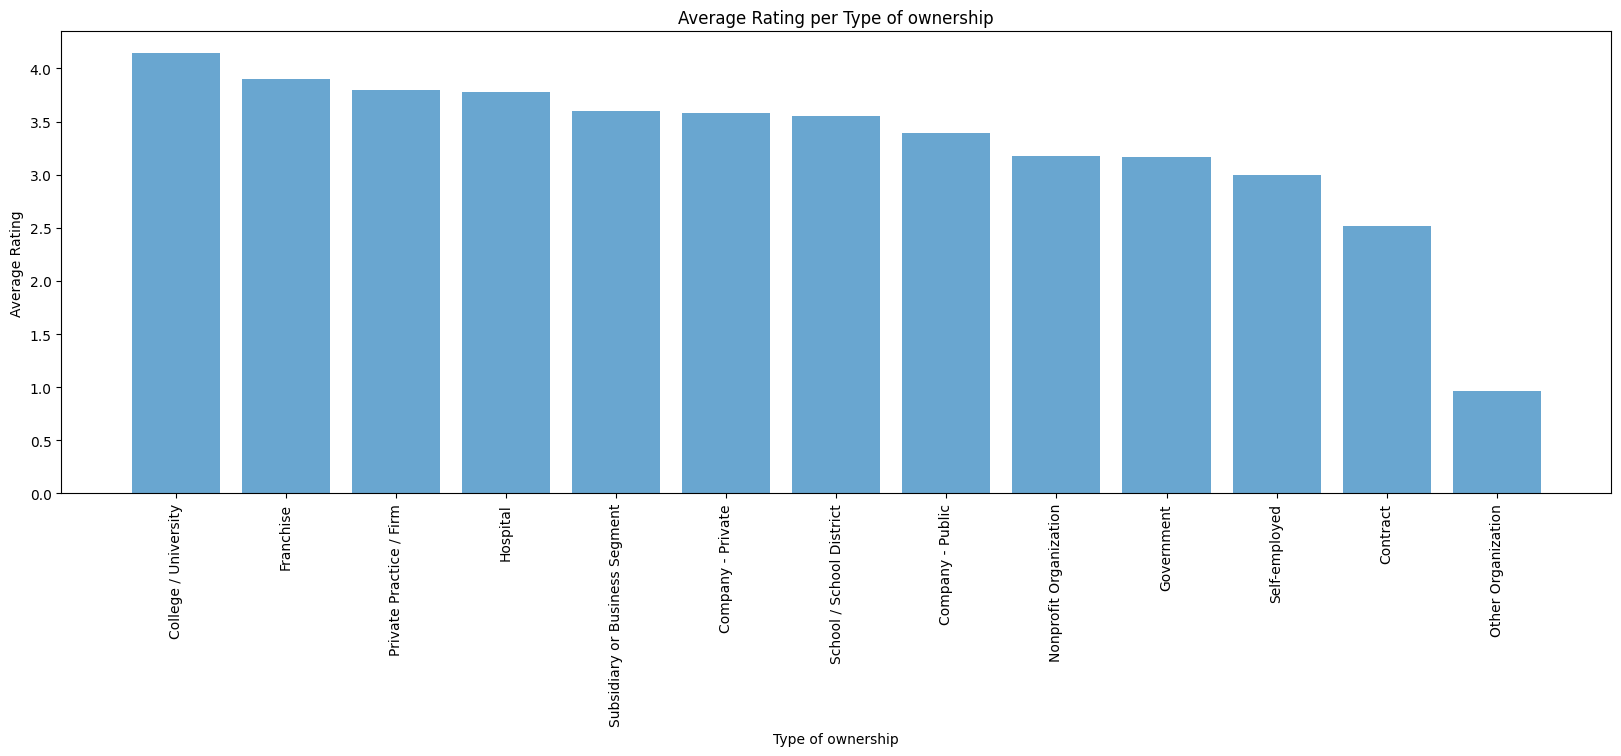

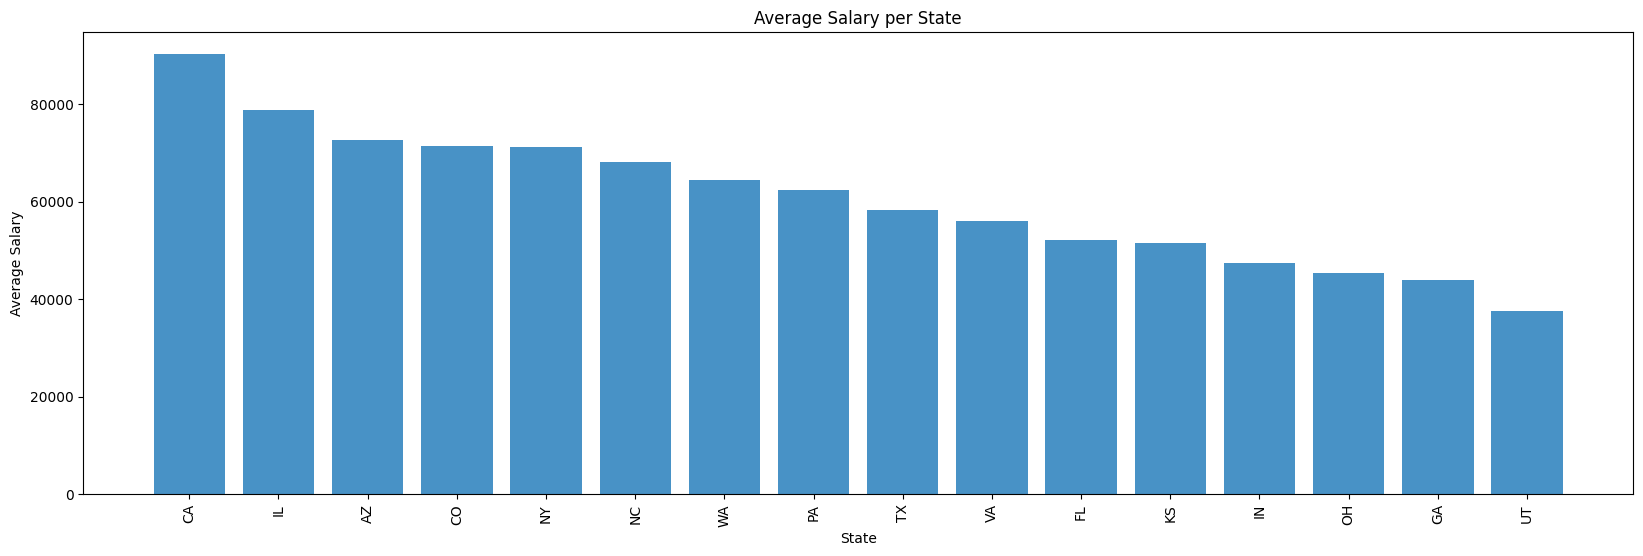

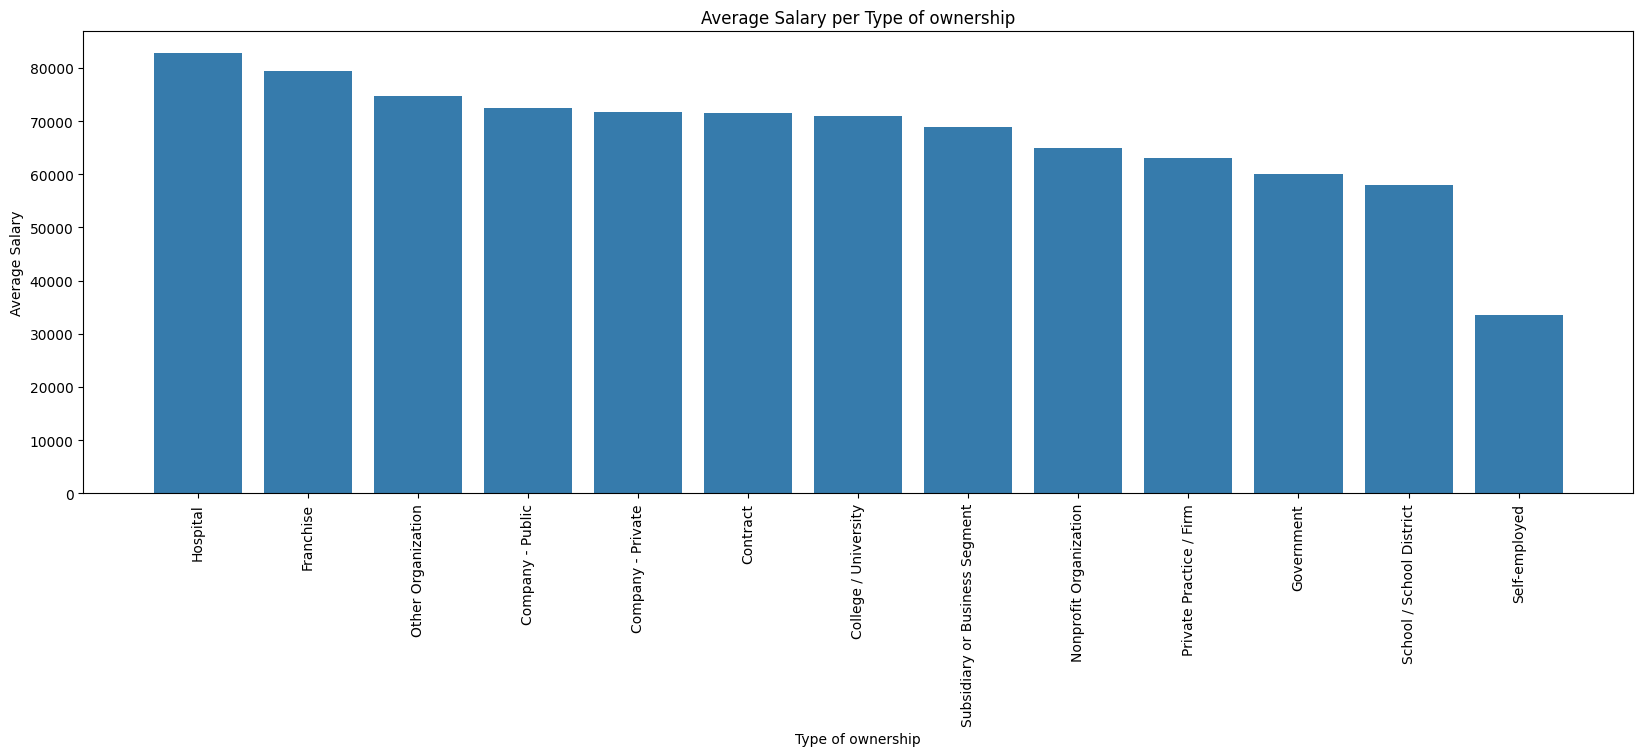

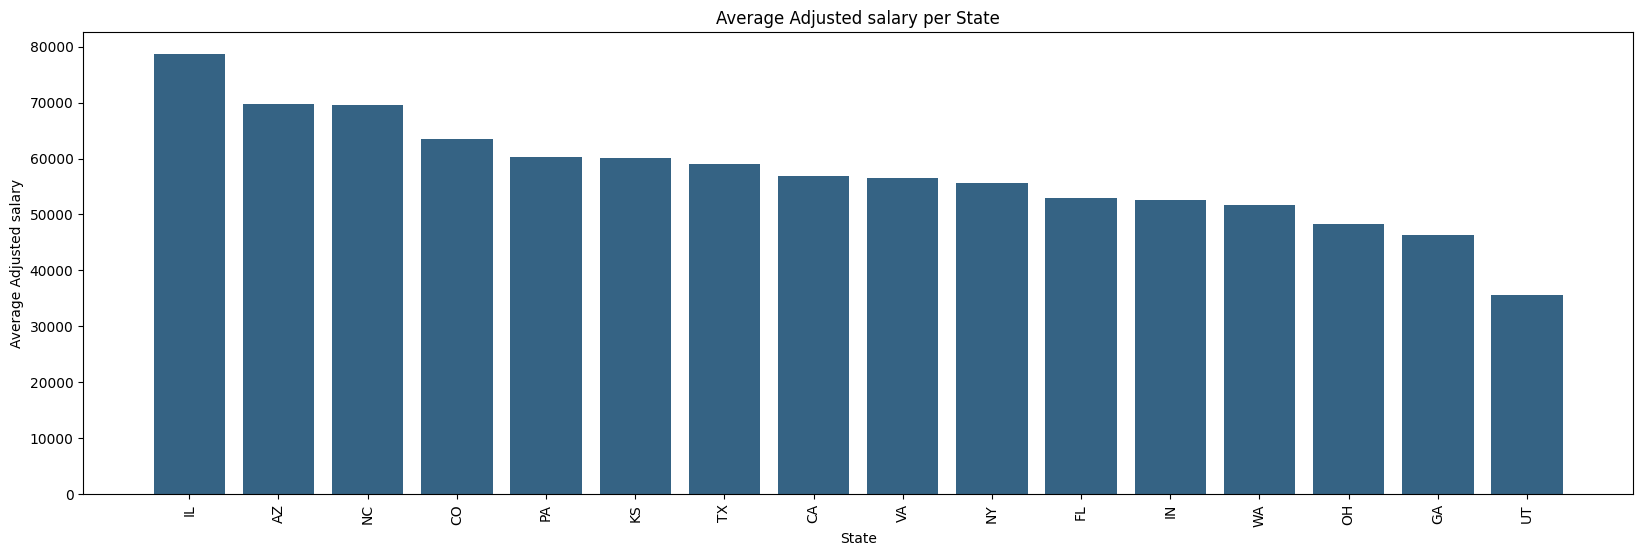

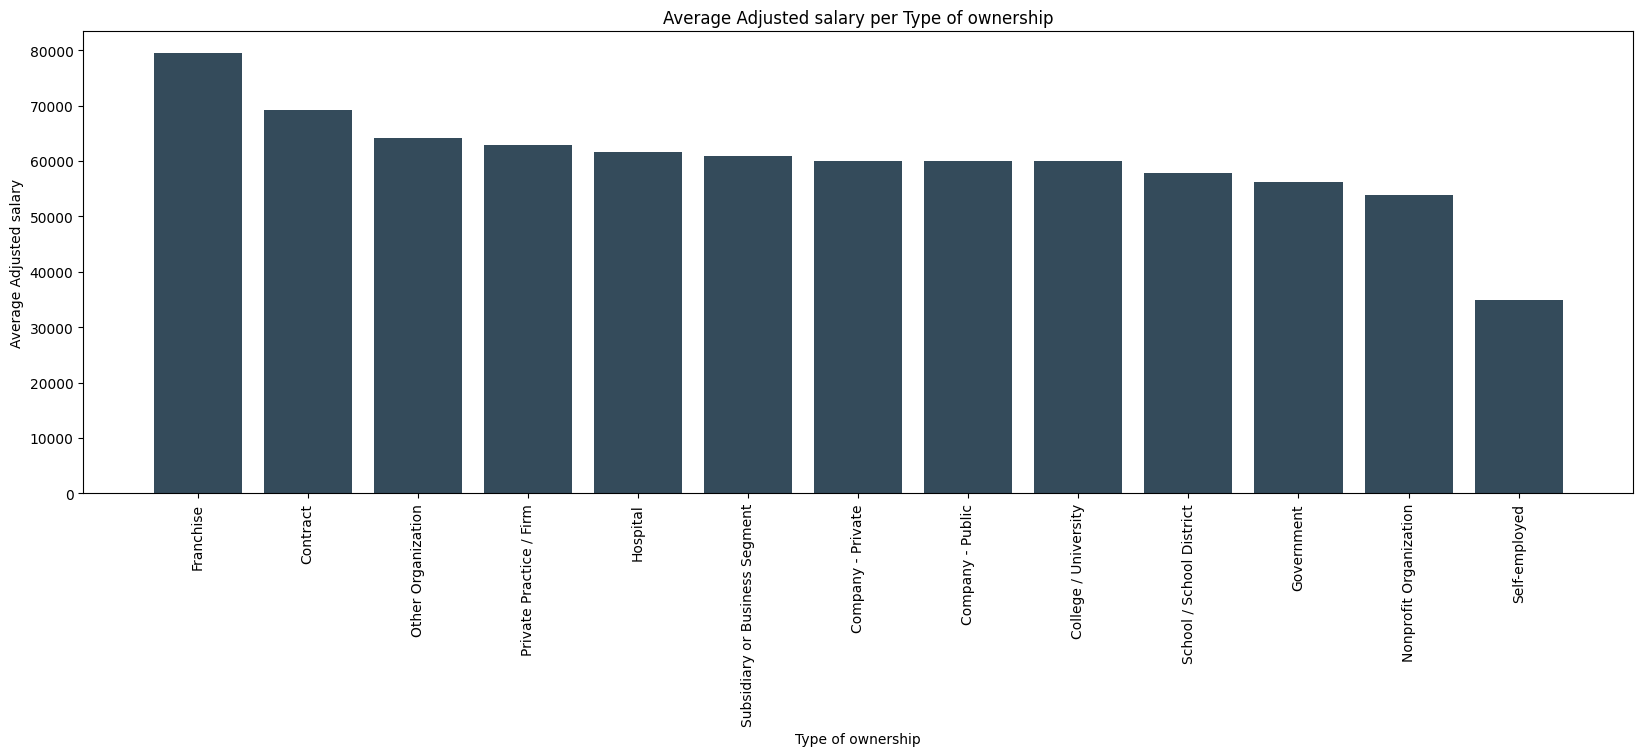

In [28]:
# get the average rating for each state
def plot_average_per_column(df, col, col2, color):
    avg = {}
    for i in df[col].unique():
        if i != "Not Available" and i != "Unknown":
            avg[i] = df[df[col] == i][col2].mean()
    
    # sort the dictionary by value
    avg = dict(sorted(avg.items(), key=lambda item: item[1], reverse=True))

    plt.figure(figsize=(20, 6))
    plt.bar(avg.keys(), avg.values(), color=color)
    plt.title("Average " + col2 + " per " + col + "")
    plt.xlabel(col)
    plt.xticks(rotation=90)
    plt.ylabel("Average " + col2)
    plt.show()

avg_rating_per_state = plot_average_per_column(df, "State", "Rating", colors[0])
avg_rating_ownership = plot_average_per_column(df, "Type of ownership", "Rating", colors[1])

# get the average salary for each state
avg_salary_per_state = plot_average_per_column(df, "State", "Salary", colors[2])
avg_salary_per_ownership = plot_average_per_column(df, "Type of ownership", "Salary", colors[3])

# get the average adjusted salary for each state
avg_adjusted_salary_per_state = plot_average_per_column(df, "State", "Adjusted salary", colors[4])
avg_adjusted_salary_per_ownership = plot_average_per_column(df, "Type of ownership", "Adjusted salary", colors[5])

In [11]:
# def delete_subsets(salary_ranges):
#     new_ranges = []
#     salary_ranges = sorted(salary_ranges, key=lambda x: x[0])
#     salary_ranges = sorted(salary_ranges, key=lambda x: x[-1])
#     if salary_ranges[0][0] == -1 and salary_ranges[0][1] == -1:
#         salary_ranges.pop(0)
#     i = 1
#     while i < len(salary_ranges):
#         if salary_ranges[i][0] >= salary_ranges[i-1][0] and salary_ranges[i][-1] <= salary_ranges[i-1][-1]:
            
#         else:
#             i += 1
#     return salary_ranges

# salary_ranges = delete_subsets(initial_salary_ranges)